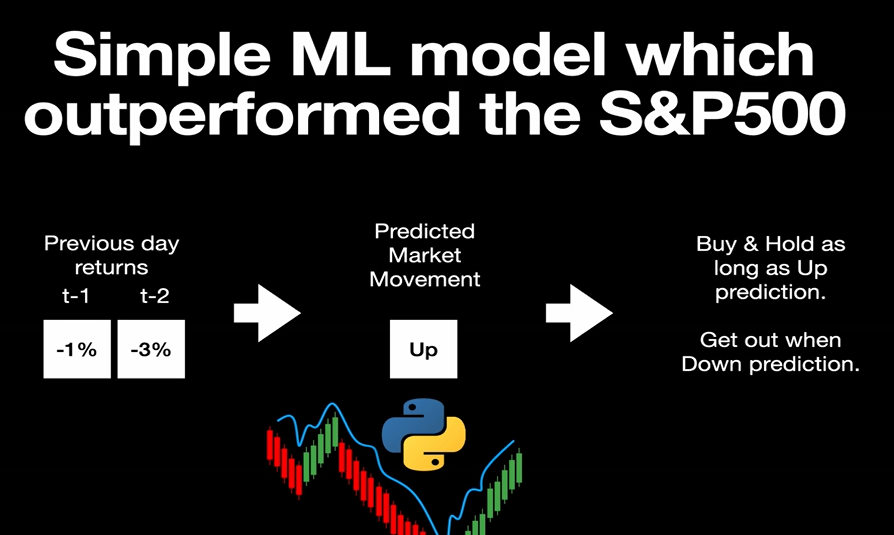

In [ ]:
# The model is based on logistic regression.
# The independent variables are previous days returns.
# Dependent variables: Up (=1), Down (=0)
# If the predicted probability is above 0.5, then the model will label it as UP

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LogisticRegression

In [ ]:
df = yf.download('^GSPC',start='2010-01-01')

In [4]:
df['ret'] = df.Close.pct_change()

In [5]:
def lagit(df, lags):
    for i in range(1,lags + 1):
        df['Lag_'+str(i)] = df['ret'].shift(i)
    return ['Lag_'+str(i) for i in range(1,lags+1)]

In [6]:
lagit(df,2)

['Lag_1', 'Lag_2']

In [9]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2
Date,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,NaN,NaN
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.003116,NaN
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.000546,0.003116
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546


In [ ]:
# I need my dependent variable ('ret') to be binary

In [10]:
df['direction'] = np.where(df.ret > 0, 1, 0)

In [12]:
features = lagit(df,3)

In [13]:
df.dropna(inplace=True)

In [17]:
X = df[features] # independent variables
# lag returns only

In [20]:
y = df['direction']

In [21]:
# Creating the Model
model = LogisticRegression(class_weight='balanced')

In [ ]:
model.fit(X,y)

In [23]:
df['prediction_lr'] = model.predict(X) # returns an array of predictions

In [24]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3,prediction_lr
Date,,,,,,,,,,,,
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001,0
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882,1
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747,0
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010823,0.002426,0.008326,0,-0.009381,1
2010-01-19,1136.030029,1150.449951,1135.770020,1150.229980,1150.229980,4724830000,0.012500,-0.010823,0.002426,1,0.008326,1
2010-01-20,1147.949951,1147.949951,1129.250000,1138.040039,1138.040039,4810560000,-0.010598,0.012500,-0.010823,0,0.002426,0
2010-01-21,1138.680054,1141.579956,1114.839966,1116.479980,1116.479980,6874290000,-0.018945,-0.010598,0.012500,0,-0.010823,1
2010-01-22,1115.489990,1115.489990,1090.180054,1091.760010,1091.760010,6208650000,-0.022141,-0.018945,-0.010598,0,0.012500,1
2010-01-25,1092.400024,1102.969971,1092.400024,1096.780029,1096.780029,4481390000,0.004598,-0.022141,-0.018945,1,-0.010598,1


In [25]:
df['strat'] = df['prediction_lr'] * df['ret']

In [26]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3,prediction_lr,strat
Date,,,,,,,,,,,,,
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001,0,-0.000000
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882,1,0.008326
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747,0,0.000000
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010823,0.002426,0.008326,0,-0.009381,1,-0.010823
2010-01-19,1136.030029,1150.449951,1135.770020,1150.229980,1150.229980,4724830000,0.012500,-0.010823,0.002426,1,0.008326,1,0.012500


In [28]:
# We now cumulate the strategy returns
(df[['strat','ret']] +1).cumprod() -1

,strat,ret
Date,,
2010-01-12,0.000000,-0.009381
2010-01-13,0.008326,-0.001133
2010-01-14,0.008326,0.001290
2010-01-15,-0.002587,-0.009547
2010-01-19,0.009880,0.002834
...,...,...
2023-09-11,4.320915,2.912414
2023-09-12,4.320915,2.890129
2023-09-13,4.327522,2.894959


In [ ]:
# We get a return of 433% versus 288% of the S&P500

<Axes: xlabel='Date'>

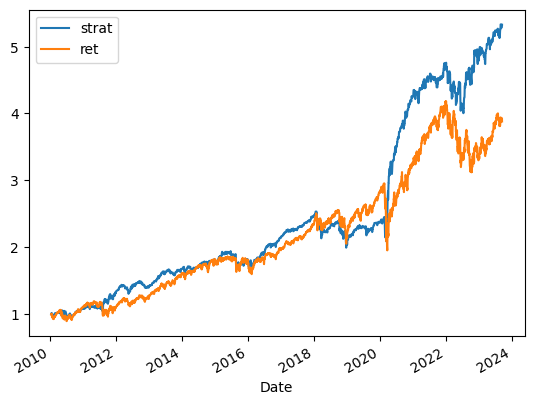

In [29]:
(df[['strat','ret']] +1).cumprod().plot()

In [ ]:
# Even so the model is 'too good to be true' as we have a case of overfitting.
# We cannot create a model based on a whole dataset.
# A solution would be to split the dataset, or train the model based only on a portion of the dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False) # suffle=False due to TimeSeriesData
# This takes 70% as training data, and the remaining 30% as testing data

In [32]:
X_train

,Lag_1,Lag_2,Lag_3
Date,,,
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
2010-01-15,0.002426,0.008326,-0.009381
2010-01-19,-0.010823,0.002426,0.008326
...,...,...,...
2019-08-02,-0.008999,-0.010886,-0.002579
2019-08-05,-0.007283,-0.008999,-0.010886
2019-08-06,-0.029778,-0.007283,-0.008999


In [33]:
X_test

,Lag_1,Lag_2,Lag_3
Date,,,
2019-08-09,0.018762,0.000767,0.013017
2019-08-12,-0.006617,0.018762,0.000767
2019-08-13,-0.012317,-0.006617,0.018762
2019-08-14,0.015132,-0.012317,-0.006617
2019-08-15,-0.029293,0.015132,-0.012317
...,...,...,...
2023-09-11,0.001427,-0.003211,-0.006972
2023-09-12,0.006723,0.001427,-0.003211
2023-09-13,-0.005696,0.006723,0.001427


In [ ]:
model.fit(X_train,y_train)

In [35]:
X_test['prediction_LR'] = model.predict(X_test)

In [36]:
X_test['ret'] = df.ret[X_test.index[0]:] # filtering taking our date onwards

In [37]:
X_test['strat'] = X_test['prediction_LR'] * X_test['ret']

In [38]:
(X_test[['strat','ret']] +1).cumprod() -1

,strat,ret
Date,,
2019-08-09,0.000000,-0.006617
2019-08-12,-0.012317,-0.018852
2019-08-13,0.002628,-0.004006
2019-08-14,0.002628,-0.033181
2019-08-15,0.005099,-0.030799
...,...,...
2023-09-11,1.291673,0.527339
2023-09-12,1.291673,0.518640
2023-09-13,1.294519,0.520525


In [ ]:
# splitting the data, the strategy is now 129%, whereas the S&P500 is only 51%

<Axes: xlabel='Date'>

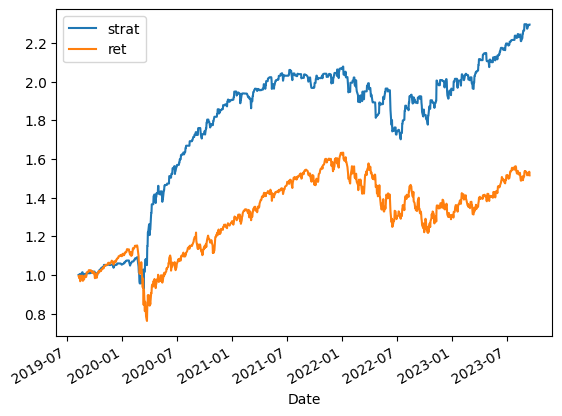

In [39]:
((X_test[['strat','ret']] +1).cumprod()).plot()